In [1]:
#importing
##data tools
import pandas as pd
pd.set_option('display.max_columns', 500)
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
##ML tools
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
#get the data
coffeeRaw = pd.read_csv('arabica_data_cleaned.csv')

In [3]:
coffeeRaw.head()

,Unnamed: 0,Species,Owner,Country.of.Origin,Farm.Name,Lot.Number,Mill,ICO.Number,Company,Altitude,Region,Producer,Number.of.Bags,Bag.Weight,In.Country.Partner,Harvest.Year,Grading.Date,Owner.1,Variety,Processing.Method,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean.Cup,Sweetness,Cupper.Points,Total.Cup.Points,Moisture,Category.One.Defects,Quakers,Color,Category.Two.Defects,Expiration,Certification.Body,Certification.Address,Certification.Contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
0,1,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,guji-hambela,METAD PLC,300,60 kg,METAD Agricultural Development plc,2014,"April 4th, 2015",metad plc,NaN,Washed / Wet,8.67,8.83,8.67,8.75,8.50,8.42,10.0,10.0,10.0,8.75,90.58,0.12,0,0.0,Green,0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
1,2,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,guji-hambela,METAD PLC,300,60 kg,METAD Agricultural Development plc,2014,"April 4th, 2015",metad plc,Other,Washed / Wet,8.75,8.67,8.50,8.58,8.42,8.42,10.0,10.0,10.0,8.58,89.92,0.12,0,0.0,Green,1,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
2,3,Arabica,grounds for health admin,Guatemala,"san marcos barrancas ""san cristobal cuch",NaN,NaN,NaN,NaN,1600 - 1800 m,NaN,NaN,5,1,Specialty Coffee Association,NaN,"May 31st, 2010",Grounds for Health Admin,Bourbon,NaN,8.42,8.50,8.42,8.42,8.33,8.42,10.0,10.0,10.0,9.25,89.75,0.00,0,0.0,NaN,0,"May 31st, 2011",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,1600.0,1800.0,1700.0
3,4,Arabica,yidnekachew dabessa,Ethiopia,yidnekachew dabessa coffee plantation,NaN,wolensu,NaN,yidnekachew debessa coffee plantation,1800-2200,oromia,Yidnekachew Dabessa Coffee Plantation,320,60 kg,METAD Agricultural Development plc,2014,"March 26th, 2015",Yidnekachew Dabessa,NaN,Natural / Dry,8.17,8.58,8.42,8.42,8.50,8.25,10.0,10.0,10.0,8.67,89.00,0.11,0,0.0,Green,2,"March 25th, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1800.0,2200.0,2000.0
4,5,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,guji-hambela,METAD PLC,300,60 kg,METAD Agricultural Development plc,2014,"April 4th, 2015",metad plc,Other,Washed / Wet,8.25,8.50,8.25,8.50,8.42,8.33,10.0,10.0,10.0,8.58,88.83,0.12,0,0.0,Green,2,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0


In [4]:
coffee = coffeeRaw[['Aroma','Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance',
                     'Total.Cup.Points']].copy()
coffee.head()

,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Total.Cup.Points
0,8.67,8.83,8.67,8.75,8.50,8.42,90.58
1,8.75,8.67,8.50,8.58,8.42,8.42,89.92
2,8.42,8.50,8.42,8.42,8.33,8.42,89.75
3,8.17,8.58,8.42,8.42,8.50,8.25,89.00
4,8.25,8.50,8.25,8.50,8.42,8.33,88.83


In [5]:
coffee.info()
coffee.isnull().sum()
#yay, no blanks!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1311 entries, 0 to 1310
Data columns (total 7 columns):
Aroma               1311 non-null float64
Flavor              1311 non-null float64
Aftertaste          1311 non-null float64
Acidity             1311 non-null float64
Body                1311 non-null float64
Balance             1311 non-null float64
Total.Cup.Points    1311 non-null float64
dtypes: float64(7)
memory usage: 71.8 KB


Aroma               0
Flavor              0
Aftertaste          0
Acidity             0
Body                0
Balance             0
Total.Cup.Points    0
dtype: int64

# Pre-Processing & Basic Analysis

In [6]:
#preprocessing into Good/Bad coffee
bins = [-1, 85, 100] #anything scoring 85 or above is good coffee™
labels = ['bad', 'good']
coffee['goodCoffee'] = pd.cut(coffee['Total.Cup.Points'], bins = bins, labels = labels)
coffee = coffee.drop(columns=['Total.Cup.Points'])
coffee['goodCoffee'].unique()


[good, bad]
Categories (2, object): [bad < good]

In [7]:
coffee['goodCoffee'].value_counts()

bad     1215
good      96
Name: goodCoffee, dtype: int64

In [8]:
#transform 'good' and 'bad' to 1 & 0
encoder = LabelEncoder()
coffee['goodCoffee'] = encoder.fit_transform(coffee['goodCoffee'])
coffee.head()

,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,goodCoffee
0,8.67,8.83,8.67,8.75,8.50,8.42,1
1,8.75,8.67,8.50,8.58,8.42,8.42,1
2,8.42,8.50,8.42,8.42,8.33,8.42,1
3,8.17,8.58,8.42,8.42,8.50,8.25,1
4,8.25,8.50,8.25,8.50,8.42,8.33,1


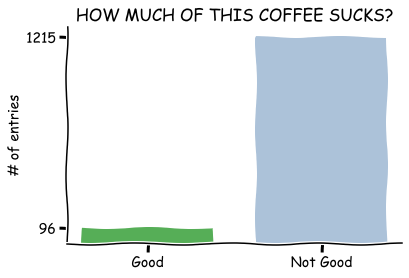

In [9]:
# Plot the data
plt.xkcd()
plt.bar(coffee['goodCoffee'].unique(), coffee['goodCoffee'].value_counts(), 
        width=0.75, align='center', color=mcolors.XKCD_COLORS)
plt.xticks([0, 1], ['Good', 'Not Good'])
plt.yticks(coffee['goodCoffee'].value_counts())

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.ylabel('# of entries')
plt.title('HOW MUCH OF THIS COFFEE SUCKS?')

plt.show()

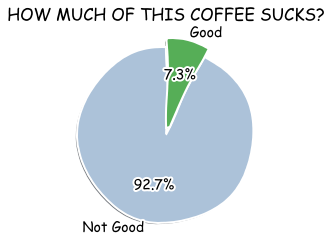

In [10]:
# and a pie chart
plt.xkcd()
plt.pie(coffee['goodCoffee'].value_counts(), explode=(0, 0.1), labels=(['Not Good', 'Good']), autopct='%1.1f%%',
        shadow=True, startangle=90, colors=mcolors.XKCD_COLORS)
plt.title('HOW MUCH OF THIS COFFEE SUCKS?')

plt.show()

In [11]:
#seperate feature/response vars
X = coffee.drop(columns=['goodCoffee'])
y = coffee['goodCoffee']
#train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
#standardize values
sc = StandardScaler() 
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Test the models

## Random Forest Classifier

In [13]:
#better for mid-size datasets
rfc = RandomForestClassifier(n_estimators = 200)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)

In [15]:
#how well did model perform?
print(classification_report(y_test, pred_rfc))
print(confusion_matrix(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       244
           1       0.74      0.74      0.74        19

    accuracy                           0.96       263
   macro avg       0.86      0.86      0.86       263
weighted avg       0.96      0.96      0.96       263

[[239   5]
 [  5  14]]


## SVM Classifier

In [16]:
#better for smaller datasets
clf = svm.SVC()
clf.fit(X_train, y_train)
pred_clf = clf.predict(X_test)

In [17]:
#how well did model perform?
print(classification_report(y_test, pred_clf))
print(confusion_matrix(y_test, pred_clf))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       244
           1       0.78      0.74      0.76        19

    accuracy                           0.97       263
   macro avg       0.88      0.86      0.87       263
weighted avg       0.97      0.97      0.97       263

[[240   4]
 [  5  14]]


## Neural Network (Multi-Layer Percepitron Classifier)

In [30]:
#better for huge amounts of data
mlpc= MLPClassifier(hidden_layer_sizes=(11, 11, 11), max_iter=500)
mlpc.fit(X_train, y_train)
pred_mlpc = mlpc.predict(X_test)

In [31]:
print(classification_report(y_test, pred_mlpc))
print(confusion_matrix(y_test, pred_mlpc))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98       244
           1       0.76      0.84      0.80        19

    accuracy                           0.97       263
   macro avg       0.87      0.91      0.89       263
weighted avg       0.97      0.97      0.97       263

[[239   5]
 [  3  16]]


## What's best?

In [40]:
from sklearn.metrics import accuracy_score
acc_rfc = accuracy_score(y_test, pred_rfc)
acc_clf = accuracy_score(y_test, pred_clf)
acc_mlpc = accuracy_score(y_test, pred_mlpc)

print(f"Random Forest was {acc_rfc:.2%} accurate")
print(f"SVM was {acc_clf:.2%} accurate")
print(f"Neural Network was {acc_mlpc:.2%} accurate")

Random Forest was 96.20% accurate
SVM was 96.58% accurate
Neural Network was 96.96% accurate


# Predicting future values

In [46]:
#a reminder what our data looks like
coffee[90:100]

,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,goodCoffee
90,8.42,8.00,7.42,8.00,7.92,7.92,1
91,7.58,7.83,7.83,7.92,7.83,8.17,1
92,7.83,8.00,7.75,7.75,7.83,7.83,1
93,8.08,8.17,7.92,8.00,8.08,8.00,1
94,7.67,8.00,7.83,8.00,7.92,7.83,1
95,7.50,7.92,8.25,7.83,7.92,7.75,1
96,8.17,7.92,7.75,7.75,7.67,7.75,0
97,8.00,7.92,7.75,7.92,7.75,7.83,0
98,7.83,8.00,7.58,7.92,7.92,7.83,0
99,7.83,8.00,7.83,7.75,7.67,7.83,0


In [67]:
#---------------
#EDIT ME!
new_Aroma = 8
new_Flavor = 7.5
new_Aftertaste = 8
new_Acidity = 8
new_Body = 7.9
new_Balance = 8
#---------------

In [68]:
X_new = [[new_Aroma, new_Flavor, new_Aftertaste, new_Acidity, new_Body, new_Balance]]
X_new = sc.transform(X_new)
y_new = rfc.predict(X_new)
print(y_new)
if y_new[0] == 1: 
    print("it's good!")
else: 
    print ("it's not good!")

[1]
it's good!
